<a href="https://colab.research.google.com/github/DanielRasho/FaceToPix/blob/main/StyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
BASE_PATH = "/content/drive/MyDrive/Proyecto FaceToPix"
# PIXEL_PATH = f"{BASE_PATH}/data/pyxel"
# SHARP_PATH = f"{BASE_PATH}/data/faces"
# PIXEL_PATH = f"{BASE_PATH}/data/sample_pyxel"
# PIXEL_PATH = f"{BASE_PATH}/Pixie"
PIXEL_PATH = f"{BASE_PATH}/data/clean_pix/"
SHARP_PATH = f"{BASE_PATH}/data/sample_faces"

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import copy

torch.autograd.set_detect_anomaly(True)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Using device: cuda
FACE TO PIXEL ART STYLE TRANSFER

Processing random pairs from dataset...
This will create stylized face-to-pixel-art images.
Found 21551 content images and 4662 style images

--- Processing pair 1/3 ---


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Processing: 1.png + agent-47-384071.png
Step [50/5000] Content Loss: 14.2522 Style Loss: 0.0003
Step [100/5000] Content Loss: 15.7959 Style Loss: 0.0002
Step [150/5000] Content Loss: 16.7550 Style Loss: 0.0002
Step [200/5000] Content Loss: 17.4450 Style Loss: 0.0001
Step [250/5000] Content Loss: 18.0005 Style Loss: 0.0001
Step [300/5000] Content Loss: 18.4361 Style Loss: 0.0001
Step [350/5000] Content Loss: 18.7914 Style Loss: 0.0001
Step [400/5000] Content Loss: 19.0710 Style Loss: 0.0001
Step [450/5000] Content Loss: 19.3414 Style Loss: 0.0001
Step [500/5000] Content Loss: 19.5716 Style Loss: 0.0001
Step [550/5000] Content Loss: 19.7093 Style Loss: 0.0001
Step [600/5000] Content Loss: 19.8863 Style Loss: 0.0001
Step [650/5000] Content Loss: 20.0540 Style Loss: 0.0001
Step [700/5000] Content Loss: 20.2177 Style Loss: 0.0001
Step [750/5000] Content Loss: 20.3530 Style Loss: 0.0001
Step [800/5000] Content Loss: 20.4255 Style Loss: 0.0001
Step [850/5000] Content Loss: 20.4883 Style Loss:

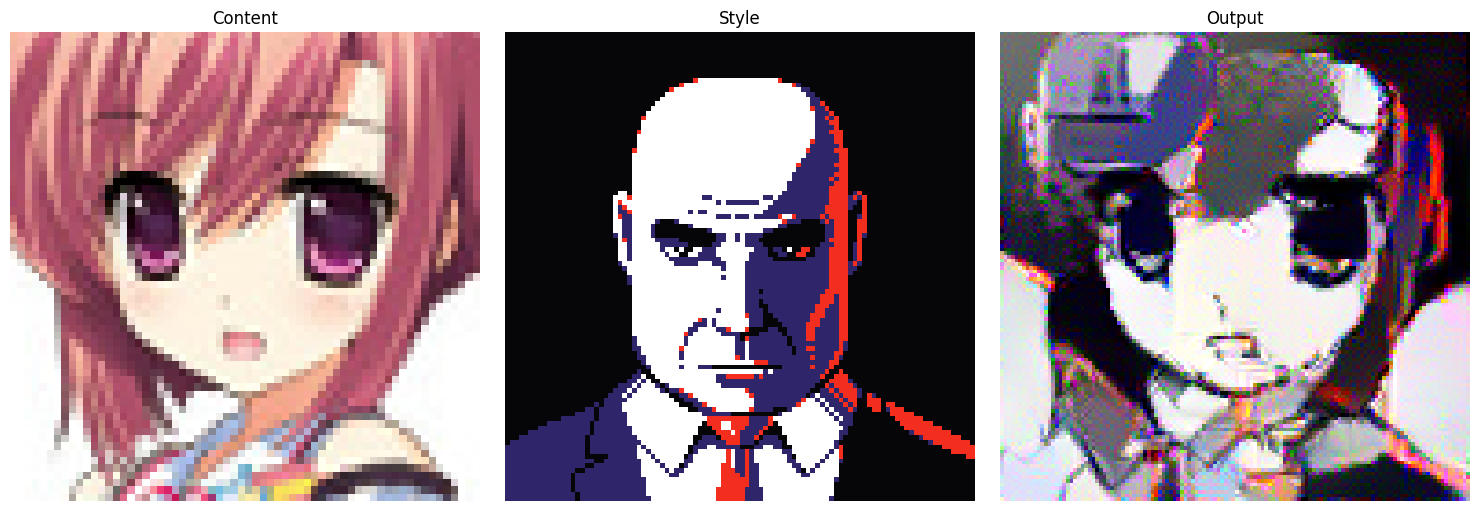

Saved to: ./style_transfer_outputs/stylized_1_agent-47-384071.jpg

--- Processing pair 2/3 ---
Processing: 100.png + agent-47-384071.png
Step [50/5000] Content Loss: 17.1914 Style Loss: 0.0003
Step [100/5000] Content Loss: 18.2317 Style Loss: 0.0002
Step [150/5000] Content Loss: 19.1339 Style Loss: 0.0002
Step [200/5000] Content Loss: 19.7333 Style Loss: 0.0001
Step [250/5000] Content Loss: 20.0842 Style Loss: 0.0001
Step [300/5000] Content Loss: 20.3649 Style Loss: 0.0001
Step [350/5000] Content Loss: 20.5387 Style Loss: 0.0001
Step [400/5000] Content Loss: 20.6836 Style Loss: 0.0001
Step [450/5000] Content Loss: 20.8222 Style Loss: 0.0001
Step [500/5000] Content Loss: 20.9386 Style Loss: 0.0001
Step [550/5000] Content Loss: 21.0301 Style Loss: 0.0001
Step [600/5000] Content Loss: 21.1344 Style Loss: 0.0001
Step [650/5000] Content Loss: 21.2473 Style Loss: 0.0001
Step [700/5000] Content Loss: 21.3749 Style Loss: 0.0001
Step [750/5000] Content Loss: 21.5072 Style Loss: 0.0001
Step [800

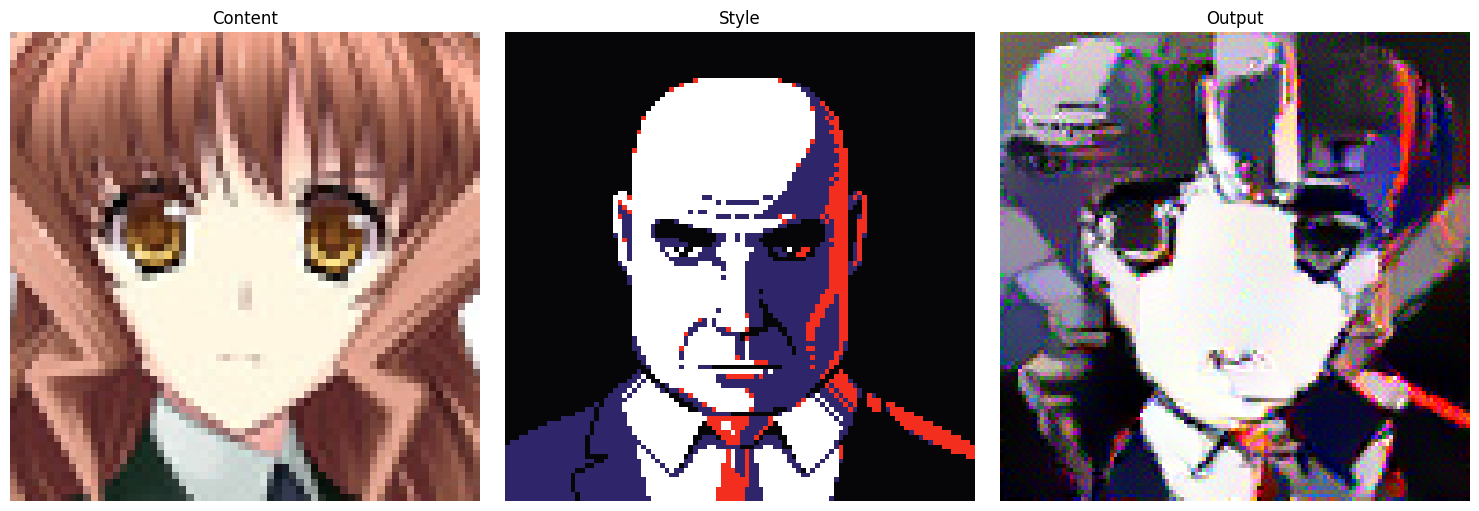

Saved to: ./style_transfer_outputs/stylized_100_agent-47-384071.jpg

--- Processing pair 3/3 ---
Processing: 10.png + agent-47-384071.png
Step [50/5000] Content Loss: 13.0742 Style Loss: 0.0003
Step [100/5000] Content Loss: 14.9476 Style Loss: 0.0002
Step [150/5000] Content Loss: 15.7243 Style Loss: 0.0002
Step [200/5000] Content Loss: 16.4484 Style Loss: 0.0001
Step [250/5000] Content Loss: 17.0338 Style Loss: 0.0001
Step [300/5000] Content Loss: 17.4101 Style Loss: 0.0001
Step [350/5000] Content Loss: 17.8234 Style Loss: 0.0001
Step [400/5000] Content Loss: 18.1242 Style Loss: 0.0001
Step [450/5000] Content Loss: 18.3398 Style Loss: 0.0001
Step [500/5000] Content Loss: 18.5165 Style Loss: 0.0001
Step [550/5000] Content Loss: 18.6978 Style Loss: 0.0001
Step [600/5000] Content Loss: 18.9627 Style Loss: 0.0001
Step [650/5000] Content Loss: 19.1328 Style Loss: 0.0001
Step [700/5000] Content Loss: 19.3166 Style Loss: 0.0001
Step [750/5000] Content Loss: 19.4371 Style Loss: 0.0001
Step [80

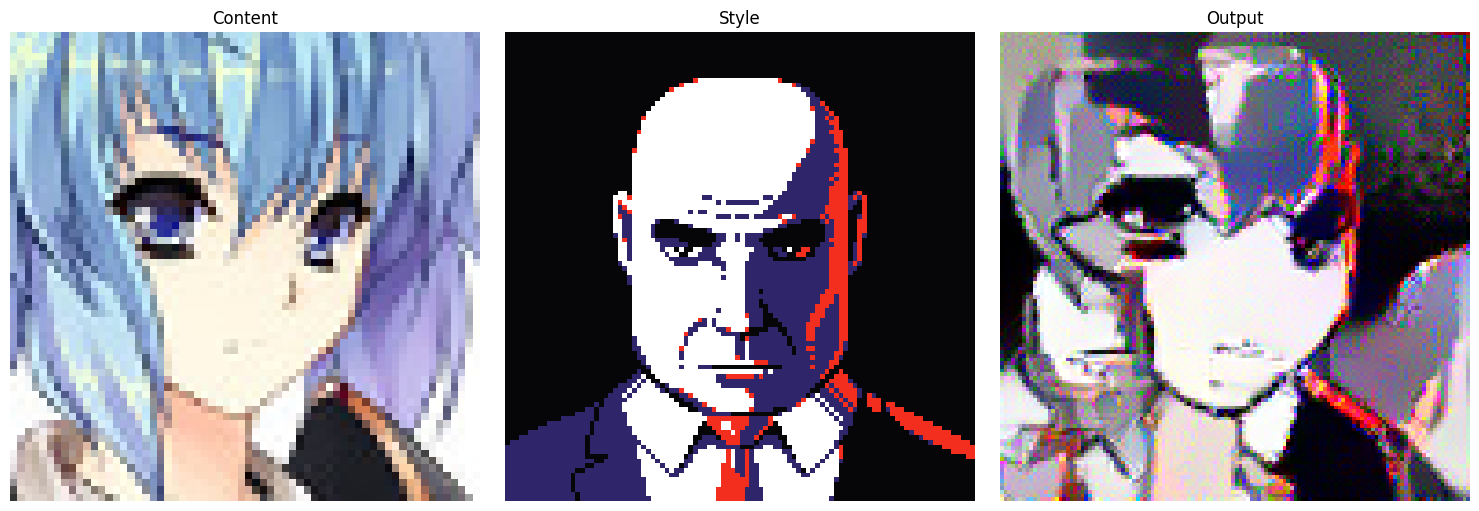

Saved to: ./style_transfer_outputs/stylized_10_agent-47-384071.jpg

Processing complete! 3 images generated.
Output directory: ./style_transfer_outputs


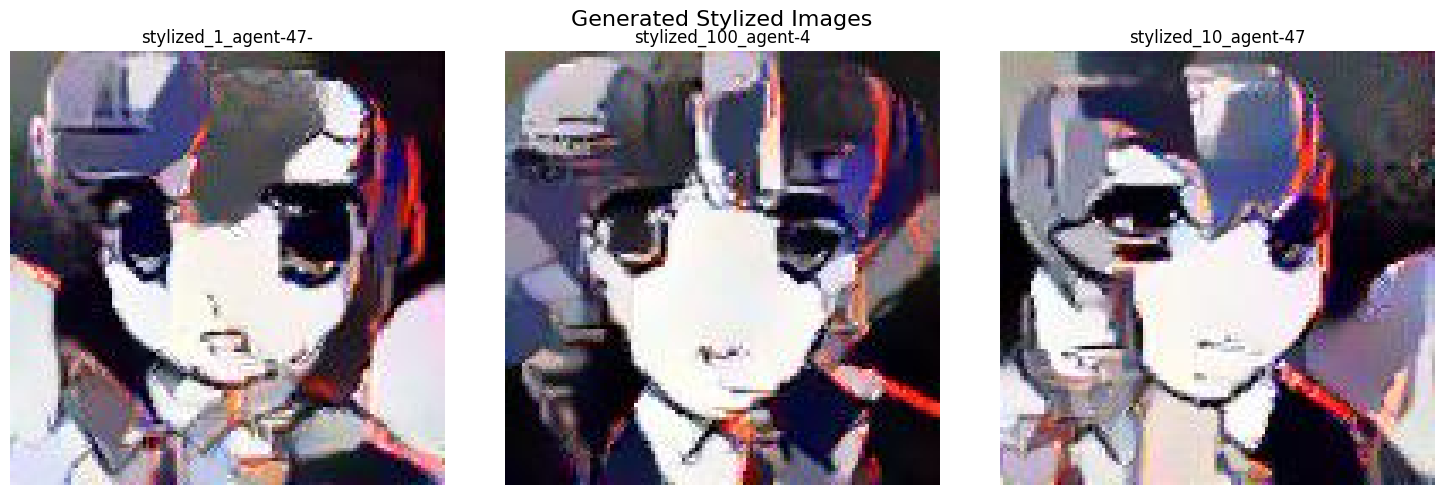

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Optional, Tuple

# ============================================
# Configuration
# ============================================

# Your paths
BASE_PATH = "/content/drive/MyDrive/Proyecto FaceToPix"
PIXEL_PATH = f"{BASE_PATH}/data/pyxel"  # Style images (pixel art)
SHARP_PATH = f"{BASE_PATH}/data/faces"  # Content images (faces)
OUTPUT_PATH = f"./style_transfer_outputs"

# Create output directory
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================
# Modified Dataset Class for Style Transfer
# ============================================

class StyleTransferDataset(Dataset):
    """
    Modified version of your ImageDataset class specifically for style transfer.
    Each item returns a pair of content and style images.
    """
    def __init__(self, content_root, style_root, image_size=128):
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor()
        ])

        self.content_files = sorted([
            os.path.join(content_root, f)
            for f in os.listdir(content_root)
            if f.endswith((".png", ".jpg", ".jpeg"))
        ])

        self.style_files = sorted([
            os.path.join(style_root, f)
            for f in os.listdir(style_root)
            if f.endswith((".png", ".jpg", ".jpeg"))
        ])

        self.len_content = len(self.content_files)
        self.len_style = len(self.style_files)

        print(f"Found {self.len_content} content images and {self.len_style} style images")

    def __len__(self):
        return max(self.len_content, self.len_style)

    def __getitem__(self, idx):
        content_img = Image.open(self.content_files[idx % self.len_content]).convert("RGB")
        style_img = Image.open(self.style_files[idx % self.len_style]).convert("RGB")

        content_tensor = self.transform(content_img)
        style_tensor = self.transform(style_img)

        return {
            "content": content_tensor,
            "style": style_tensor,
            "content_path": self.content_files[idx % self.len_content],
            "style_path": self.style_files[idx % self.len_style]
        }

# ============================================
# Simplified Style Transfer Model
# ============================================

class SimpleStyleTransfer:
    """
    Simplified style transfer model optimized for face-to-pixel-art conversion.
    """
    def __init__(self, image_size: int = 128, use_vgg19: bool = True):
        self.device = device
        self.image_size = image_size

        # Load pretrained VGG
        if use_vgg19:
            vgg = models.vgg19(pretrained=True).features
            # Layer indices for VGG19
            self.content_layers = [21]  # conv4_2
            self.style_layers = [0, 5, 10, 19, 28]  # conv1_1, conv2_1, conv3_1, conv4_1, conv5_1
        else:
            vgg = models.vgg16(pretrained=True).features
            # Layer indices for VGG16
            self.content_layers = [15]  # conv3_3
            self.style_layers = [0, 5, 10, 17, 24]  # conv1_1, conv2_1, conv3_1, conv4_1, conv5_1

        self.vgg = vgg.to(device).eval()

        # Freeze VGG parameters
        for param in self.vgg.parameters():
            param.requires_grad = False

        # Normalization for VGG
        self.mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
        self.std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)

    def extract_features(self, x: torch.Tensor) -> Tuple[list, list]:
        """Extract content and style features from VGG."""
        x = (x - self.mean) / self.std  # Normalize

        content_features = []
        style_features = []

        for i, layer in enumerate(self.vgg):
            x = layer(x)
            if i in self.content_layers:
                content_features.append(x)
            if i in self.style_layers:
                style_features.append(x)

        return content_features, style_features

    def gram_matrix(self, x: torch.Tensor) -> torch.Tensor:
        """Compute Gram matrix for style representation."""
        b, c, h, w = x.size()
        features = x.view(b * c, h * w)
        gram = torch.mm(features, features.t())
        return gram / (b * c * h * w)

    def style_transfer_single(self,
                             content_img: torch.Tensor,
                             style_img: torch.Tensor,
                             num_steps: int = 300,
                             content_weight: float = 1.0,
                             style_weight: float = 1e6,
                             lr: float = 0.003) -> torch.Tensor:
        """
        Perform style transfer on a single pair of images.

        Args:
            content_img: Content image tensor [1, 3, H, W]
            style_img: Style image tensor [1, 3, H, W]
            num_steps: Number of optimization steps
            content_weight: Weight for content loss
            style_weight: Weight for style loss
            lr: Learning rate

        Returns:
            Stylized image tensor
        """
        content_img = content_img.to(device)
        style_img = style_img.to(device)

        # Extract target features
        with torch.no_grad():
            content_features, _ = self.extract_features(content_img)
            _, style_features = self.extract_features(style_img)
            style_grams = [self.gram_matrix(f) for f in style_features]

        # Initialize output image with content image
        output_img = content_img.clone().requires_grad_(True)

        # Use Adam optimizer for faster convergence
        optimizer = optim.Adam([output_img], lr=lr)

        # Optimization loop
        for step in range(num_steps):
            optimizer.zero_grad()

            # Extract features from current output
            out_content_features, out_style_features = self.extract_features(output_img)

            # Content loss
            content_loss = 0
            for out_f, target_f in zip(out_content_features, content_features):
                content_loss += F.mse_loss(out_f, target_f)

            # Style loss
            style_loss = 0
            for out_f, target_gram in zip(out_style_features, style_grams):
                out_gram = self.gram_matrix(out_f)
                style_loss += F.mse_loss(out_gram, target_gram)

            # Total loss
            total_loss = content_weight * content_loss + style_weight * style_loss

            # Backprop and optimize
            total_loss.backward()
            optimizer.step()

            # Clamp pixel values
            output_img.data.clamp_(0, 1)

            # Print progress
            if (step + 1) % 50 == 0:
                print(f"Step [{step+1}/{num_steps}] "
                      f"Content Loss: {content_loss.item():.4f} "
                      f"Style Loss: {style_loss.item():.4f}")

        return output_img.detach()

# ============================================
# Main Processing Functions
# ============================================

def process_single_pair(content_path: str, style_path: str,
                       output_name: Optional[str] = None,
                       image_size: int = 128,
                       num_steps: int = 300,
                       content_weight: float = 1.0,
                       style_weight: float = 1e1) -> str:
    """
    Process a single content-style pair.
    """
    model = SimpleStyleTransfer(image_size=image_size)

    # Load and transform images
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor()
    ])

    content_img = Image.open(content_path).convert('RGB')
    style_img = Image.open(style_path).convert('RGB')

    content_tensor = transform(content_img).unsqueeze(0)
    style_tensor = transform(style_img).unsqueeze(0)

    print(f"Processing: {os.path.basename(content_path)} + {os.path.basename(style_path)}")

    # Perform style transfer
    output_tensor = model.style_transfer_single(
        content_tensor, style_tensor,
        num_steps=num_steps,
        content_weight=content_weight,
        style_weight=style_weight
    )

    # Save output
    if output_name is None:
        content_name = os.path.splitext(os.path.basename(content_path))[0]
        style_name = os.path.splitext(os.path.basename(style_path))[0]
        output_name = f"stylized_{content_name}_{style_name}.jpg"

    output_path = os.path.join(OUTPUT_PATH, output_name)
    output_pil = transforms.ToPILImage()(output_tensor.squeeze(0).cpu())
    output_pil.save(output_path)

    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(content_img)
    axes[0].set_title('Content')
    axes[0].axis('off')
    axes[1].imshow(style_img)
    axes[1].set_title('Style')
    axes[1].axis('off')
    axes[2].imshow(output_pil)
    axes[2].set_title('Output')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()

    print(f"Saved to: {output_path}")
    return output_path

def process_dataset_batch(num_pairs: int = 5,
                         image_size: int = 128,
                         num_steps: int = 300,
                         shuffle: bool = True):
    """
    Process multiple pairs from the dataset.
    """
    dataset = StyleTransferDataset(SHARP_PATH, PIXEL_PATH, image_size=image_size)

    indices = list(range(min(num_pairs, len(dataset))))
    if shuffle:
        import random
        random.shuffle(indices)

    results = []
    for i, idx in enumerate(indices):
        data = dataset[idx]

        print(f"\n--- Processing pair {i+1}/{num_pairs} ---")
        output_path = process_single_pair(
            data["content_path"],
            f'{BASE_PATH}/data/pyxel/agent-47-384071.png',
            image_size=image_size,
            num_steps=num_steps,
            style_weight=1e7
        )
        results.append(output_path)

    return results

# ============================================
# Quick Start Examples
# ============================================

if __name__ == "__main__":
    print("=" * 50)
    print("FACE TO PIXEL ART STYLE TRANSFER")
    print("=" * 50)

    # Example 1: Process a specific pair
    # Uncomment and modify paths as needed
    """
    content_image = os.path.join(SHARP_PATH, "face1.jpg")  # Replace with actual filename
    style_image = os.path.join(PIXEL_PATH, "pixel1.jpg")   # Replace with actual filename

    if os.path.exists(content_image) and os.path.exists(style_image):
        output = process_single_pair(
            content_image,
            style_image,
            image_size=128,
            num_steps=500,
            content_weight=1,
            style_weight=1e6
        )
    """

    # Example 2: Process random pairs from dataset
    print("\nProcessing random pairs from dataset...")
    print("This will create stylized face-to-pixel-art images.")

    # Process 3 random pairs
    results = process_dataset_batch(
        num_pairs=3,
        image_size=128,
        num_steps=5000,
        shuffle=True
    )

    print("\n" + "=" * 50)
    print(f"Processing complete! {len(results)} images generated.")
    print(f"Output directory: {OUTPUT_PATH}")
    print("=" * 50)

    # Create a gallery of all results
    if results:
        fig, axes = plt.subplots(1, len(results), figsize=(5*len(results), 5))
        if len(results) == 1:
            axes = [axes]

        for ax, img_path in zip(axes, results):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(os.path.basename(img_path)[:20])
            ax.axis('off')

        plt.suptitle("Generated Stylized Images", fontsize=16)
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_PATH, "gallery.jpg"), dpi=150)
        plt.show()